In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from io import StringIO
from sklearn.feature_extraction.text import CountVectorizer
plt.style.use('seaborn')

## Read in and inspect data

In [183]:
recipes_df = pd.read_pickle('./data/recipes_clean_10k')

In [184]:
pd.set_option('display.max_columns', None)

In [185]:
recipes_df = recipes_df.drop(columns = 'level_0')

In [186]:
recipes_df.head(2)

,index,Name,CookTime,PrepTime,TotalTime,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,calories_per_serving
0,2,Best Lemonade,5.0,30.0,35.0,Beverages,"(Low Protein, Low Cholesterol, Healthy, Summer...","""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4""","(sugar, lemons, rind of, lemon, zest of, fresh...",4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,"(Into a 1 quart Jar with tight fitting lid, pu...",77.775
1,4,Cabbage Soup,30.0,20.0,50.0,Vegetable,"(Low Protein, Vegan, Low Cholesterol, Healthy,...","c(""46"", ""4"", ""1"", ""2"", ""1"")","(plain tomato juice, cabbage, onion, carrots, ...",4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,"(Mix everything together and bring to a boil.,...",25.900


#### Inspect Recipe Category

<AxesSubplot:>

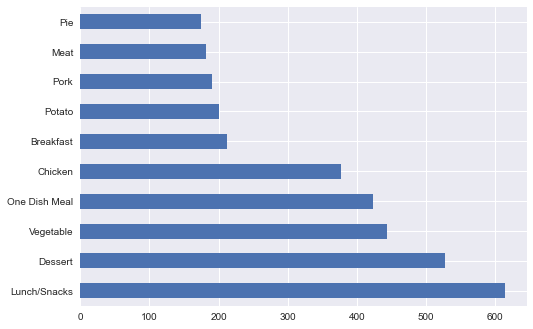

In [187]:
recipes_df['RecipeCategory'].value_counts().head(10).plot(kind='barh')

#### Prepare and inspect Recipe Ingredients

In [189]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [190]:
popular_ingredients = to_1D(recipes_df['RecipeIngredientParts']).value_counts()

In [224]:
food_popularity = to_1D(recipes_df['RecipeIngredientParts']).value_counts().head(10)

<AxesSubplot:>

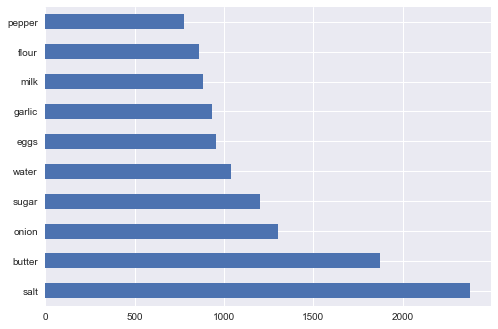

In [227]:
food_popularity.plot(kind = 'barh')

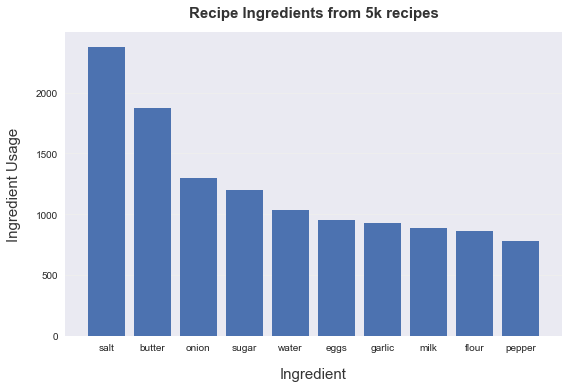

In [242]:
# https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
fig, ax = plt.subplots()

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=np.arange(food_popularity.size),
    height=food_popularity,
     tick_label=food_popularity.index
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
ax.set_xlabel('Ingredient', labelpad=15, color='#333333', fontsize=15)
ax.set_ylabel('Ingredient Usage', labelpad=15, color='#333333', fontsize=15)
ax.set_title('Recipe Ingredients from 5k recipes', pad=15, color='#333333',
             weight='bold', fontsize=15)

fig.tight_layout()

fig.savefig('./graphs/recipe_ingredients.jpg')

#### Least popular Ingredients

<AxesSubplot:>

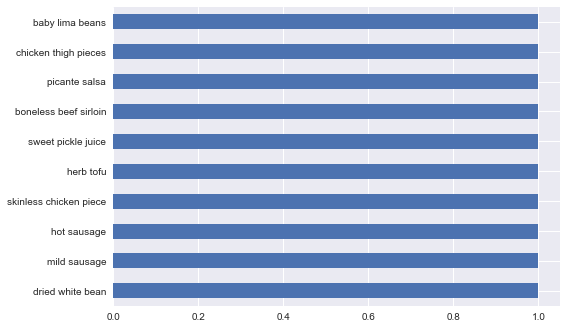

In [192]:
to_1D(recipes_df['RecipeIngredientParts']).value_counts().tail(10).plot(kind='barh')

#### Recipe rating by cooking time

In [261]:
rating_time = recipes_df.groupby('AggregatedRating')['CookTime'].mean().tail(8)

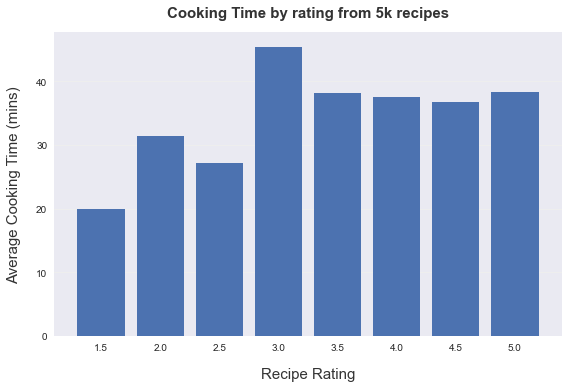

In [265]:
# https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
fig, ax = plt.subplots()

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=np.arange(rating_time.size),
    height=rating_time,
     tick_label=rating_time.index
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
ax.set_xlabel('Recipe Rating', labelpad=15, color='#333333', fontsize=15)
ax.set_ylabel('Average Cooking Time (mins)', labelpad=15, color='#333333', fontsize=15)
ax.set_title('Cooking Time by rating from 5k recipes', pad=15, color='#333333',
             weight='bold', fontsize=15)

fig.tight_layout()

fig.savefig('./graphs/ratings_time.jpg')